In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 모듈 설치 
import pandas as pd
import numpy as np

In [ ]:
# 트랜스포머 설치 
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.4 MB/s eta 0:00:00


In [ ]:
# 전체 데이터 통합본을 데이터셋으로 사용함
import pandas as pd
emotion_df = pd.read_excel('/content/drive/MyDrive/total_data.xlsx')

In [ ]:
emotion_df

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
453886,은퇴를 했다가 복귀를 한 경기였다고 해요.,슬픔
453887,온도의 양극화가 되어 있는 식문화가 있습니다.,슬픔
453888,틈이 없다라는 얘기를 가끔씩 듣는데요.,슬픔
453889,"그래서 어, 한 번 만들어볼까 그때 시작됐죠.",슬픔


In [ ]:
# 전처리 
def data_clean( df ):
  df = df.dropna() # 결측제거
  df = df.drop_duplicates() # 중복제거
  df = df.reset_index(drop=True) # 인덱스 리셋
  return df

In [ ]:
# emotion_df = data_clean(emotion_df)

In [ ]:
emotion_df.sample(n=10)

,sentence,emotion
424296,주말 모임이라도 찾아볼까 봐.,상처
344212,몸을 쓰지 않는 다른 일을 찾아보는 것이 좋겠어. 친구들과 의견을 나누어 봐야겠다.,상처
162630,글쎄. 그야 모르지. 투자로 돈을 벌면 자식들 결혼할 때 큰 선물을 주려고 했는데 ...,슬픔
453512,상당수가 논란이라는 표현을 썼던 것 같아요.,슬픔
1087,문화센터에서 배우고 싶은 걸 배우고 사람들과 교류도 하니 기쁘다.,기쁨
121135,아내에게 진지하게 더우니까 조금 떨어져서 걷자고 말해야겠어.,분노
421996,자식한테 따뜻한 옷 하나만 사달라고 해보겠어.,당황
438521,여건이 안 된다고 말씀드리고 설득해야겠어.,분노
259819,정신이 마비되는 줄 알았어. 그런데 아들이 입원한 음압 병동은 면회가 안 된다고 그러네.,슬픔
174257,직원들과 함께 여행을 다녀오면 좋을 거 같아.,기쁨


In [ ]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453891 entries, 0 to 453890
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  453891 non-null  object
 1   emotion   453891 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


In [ ]:
emotion_df.loc[(emotion_df['emotion'] == "불안"), 'emotion'] = 0
emotion_df.loc[(emotion_df['emotion'] == "당황"), 'emotion'] = 1 
emotion_df.loc[(emotion_df['emotion'] == "분노"), 'emotion'] = 2 
emotion_df.loc[(emotion_df['emotion'] == "슬픔"), 'emotion'] = 3  
emotion_df.loc[(emotion_df['emotion'] == "기쁨"), 'emotion'] = 4 
emotion_df.loc[(emotion_df['emotion'] == "상처"), 'emotion'] = 5  

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(emotion_df['emotion'])
num_labels = len(label_encoder.classes_)

emotion_df['emotion'] = np.asarray(label_encoder.transform(emotion_df['emotion']), dtype=np.int32)
emotion_df.head()

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,2
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,2
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,2
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,2
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,2


In [ ]:
label_encoder.classes_

array([0, 1, 2, 3, 4, 5], dtype=object)

In [ ]:
train_texts = emotion_df["sentence"].to_list() # Features (not-tokenized yet)
train_labels = emotion_df["emotion"].to_list() # Labels

In [ ]:
from sklearn.model_selection import train_test_split

# Split Train and Validation data
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=0)

In [ ]:
HUGGINGFACE_MODEL_PATH = "klue/bert-base"

In [ ]:
from transformers import BertTokenizerFast

# Load Tokenizer
tokenizer = BertTokenizerFast.from_pretrained(HUGGINGFACE_MODEL_PATH)

# Tokenizing
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [ ]:
import tensorflow as tf

# trainset-set
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

# validation-set
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [ ]:
import gc
gc.collect()

0

In [ ]:
from transformers import TFBertForSequenceClassification

num_labels = 6
model = TFBertForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH, num_labels=num_labels, from_pt=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import time
import datetime

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001, # the threshold that triggers the termination (acc should at least improve 0.001)
    patience=2)

start = time.time()
history = model.fit( 
    train_dataset.shuffle(1000).batch(32), epochs=5, batch_size=32,
    steps_per_epoch=1000,      
    validation_data=val_dataset.shuffle(1000).batch(32),
    validation_steps=200,
    callbacks = [callback_earlystop])
end = time.time()
print(str(datetime.timedelta(seconds=(end - start))))

Epoch 1/5
1000/1000 [==============================] - 673s 621ms/step - loss: 1.4781 - accuracy: 0.3951 - val_loss: 1.4460 - val_accuracy: 0.4189
Epoch 2/5
1000/1000 [==============================] - 619s 619ms/step - loss: 1.4074 - accuracy: 0.4315 - val_loss: 1.3896 - val_accuracy: 0.4431
Epoch 3/5
1000/1000 [==============================] - 611s 611ms/step - loss: 1.3703 - accuracy: 0.4516 - val_loss: 1.3540 - val_accuracy: 0.4584
Epoch 4/5
1000/1000 [==============================] - 611s 611ms/step - loss: 1.3500 - accuracy: 0.4623 - val_loss: 1.3574 - val_accuracy: 0.4598
Epoch 5/5
1000/1000 [==============================] - 611s 611ms/step - loss: 1.3270 - accuracy: 0.4716 - val_loss: 1.3212 - val_accuracy: 0.4837
0:52:53.092767


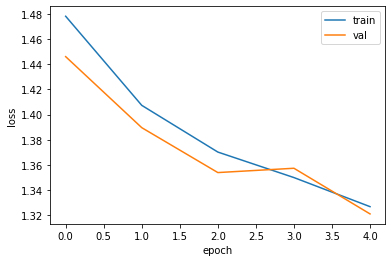

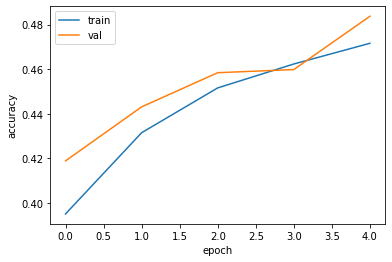

In [ ]:
# loss 확인 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
 
 
# accuracy 확인 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
# 모델 저장
# model.save_pretrained('저장할 경로 지정')
model.save_pretrained('/content/drive/MyDrive/klue_model_2')
tokenizer.save_pretrained('/content/drive/MyDrive/klue_model_2')

('/content/drive/MyDrive/klue_model/tokenizer_config.json',
 '/content/drive/MyDrive/klue_model/special_tokens_map.json',
 '/content/drive/MyDrive/klue_model/vocab.txt',
 '/content/drive/MyDrive/klue_model/added_tokens.json',
 '/content/drive/MyDrive/klue_model/tokenizer.json')